Zad 1

In [125]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/fatal-police-shootings-data.csv")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


Zad 2

In [18]:
df_pivot=df.pivot_table(values='id',index='race', columns='signs_of_mental_illness', aggfunc=len)
df_pivot

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


Zad 3

In [19]:
df_pivot['percent_ill'] = df_pivot.apply(lambda row: (row[1] / row.sum())*100, axis=1).round(2)
df_pivot

signs_of_mental_illness,False,True,percent_ill
race,,,
A,69,24,25.81
B,1114,184,14.18
H,745,157,17.41
N,64,14,17.95
O,37,11,22.92
W,1763,713,28.80


Największym odesetkiem znamion choroby psychicznej podczas interwencji charakteryzuje się rasa W

Zad 4

In [20]:
import matplotlib.pyplot as plt

In [61]:
df["date"]=pd.to_datetime(df["date"])
df["week_day"]=df['date'].dt.day_name()

df_pivot_2=df.pivot_table(values="id",index="week_day", aggfunc=len)
order=[1, 5, 6, 4, 0, 2, 3]
df_sorted_by_days=df_pivot_2.iloc[order]
df_sorted_by_days

,id
week_day,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


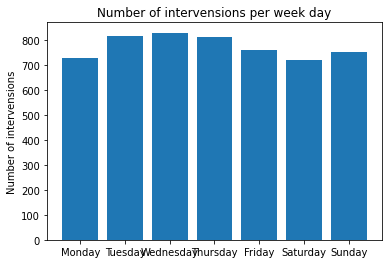

In [62]:
fig, ax = plt.subplots()

x=df_sorted_by_days.index.tolist()
y=df_sorted_by_days["id"]

ax.bar(x, y)

ax.set_ylabel("Number of intervensions")
ax.set_title("Number of intervensions per week day")

plt.show()

Zad 5

In [100]:
data_1 = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population", header=0)
df_pop=data_1[0]
data_2 = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations", header=0)
df_abbr=data_2[0]


In [148]:
new_df_abbr=df_abbr.iloc[11:,[0,3]]
new_df_abbr.dropna(inplace=True)
new_df_abbr.columns=["State","Abbreviation"]
new_df_abbr

,State,Abbreviation
11,Alabama,AL
12,Alaska,AK
13,Arizona,AZ
14,Arkansas,AR
15,California,CA
16,Colorado,CO
17,Connecticut,CT
18,Delaware,DE
19,District of Columbia,DC
20,Florida,FL


In [149]:
df_pop["Average population"]=((df_pop.iloc[:,3]+df_pop.iloc[:,4])/2).round(0)
df_pop

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020[1][2]","Census population, April 1, 2010[1][2]","Percent change, 2010–2020[note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote[note 2],Census population per House seat,"Percent of the total U.S. population, 2020[note 3]",Average population
0,1.0,1.0,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%,38396090.0
1,2.0,2.0,Texas,29145505,25145561,15.9%,+3999944,38,728638,766987,8.70%,27145533.0
2,3.0,4.0,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%,20169748.0
3,4.0,3.0,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%,19789676.0
4,5.0,6.0,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%,12852540.0
5,6.0,5.0,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%,12821570.0
6,7.0,7.0,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%,11667976.0
7,8.0,9.0,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%,10199780.0
8,9.0,10.0,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%,9987436.0
9,10.0,8.0,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%,9980486.0


In [150]:
new_df_pop=df_pop.iloc[:,[2,11]]
new_df_pop

,State,Average population
0,California,38396090.0
1,Texas,27145533.0
2,Florida,20169748.0
3,New York,19789676.0
4,Pennsylvania,12852540.0
5,Illinois,12821570.0
6,Ohio,11667976.0
7,Georgia,10199780.0
8,North Carolina,9987436.0
9,Michigan,9980486.0


In [151]:
df_pivot_3=df.pivot_table(values='id',index='state', aggfunc=len)
df_pivot_3.reset_index(inplace=True)
df_pivot_3.columns=["Abbreviation","Number of intervensions"]
df_pivot_3

,Abbreviation,Number of intervensions
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799
5,CO,195
6,CT,21
7,DC,13
8,DE,13
9,FL,350


In [152]:
mid_df=pd.merge(new_df_abbr,df_pivot_3,how="inner",on="Abbreviation")
mid_df

,State,Abbreviation,Number of intervensions
0,Alabama,AL,104
1,Alaska,AK,39
2,Arizona,AZ,254
3,Arkansas,AR,83
4,California,CA,799
5,Colorado,CO,195
6,Connecticut,CT,21
7,Delaware,DE,13
8,District of Columbia,DC,13
9,Florida,FL,350


In [162]:
final_df=pd.merge(mid_df,new_df_pop,how="inner",on="State")
final_df["No of intervensions per 1000 people"]=(final_df["Number of intervensions"]*1000)/final_df["Average population"]
final_df.sort_values(by="No of intervensions per 1000 people")

,State,Abbreviation,Number of intervensions,Average population,No of intervensions per 1000 people
39,Rhode Island,RI,4,1074973.0,0.003721
32,New York,NY,101,19789676.0,0.005104
21,Massachusetts,MA,35,6788773.0,0.005156
6,Connecticut,CT,21,3590020.0,0.005850
30,New Jersey,NJ,68,9040444.0,0.007522
22,Michigan,MI,78,9980486.0,0.007815
13,Illinois,IL,104,12821570.0,0.008111
38,Pennsylvania,PA,108,12852540.0,0.008403
29,New Hampshire,NH,13,1347000.0,0.009651
15,Iowa,IA,32,3118362.0,0.010262
